<a href="https://colab.research.google.com/github/Vinicius-L-R-Matos/-Repositorio-DS/blob/master/_notebooks/2021_11_29_FE_Climate_Change_Delhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FE Climate Change 
> "Como remover outliers de séries temporais"



[Desafio Clima Kaggel ](https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data?select=DailyDelhiClimateTrain.csv)

EDA Realizada Anteriormente

[EDA](https://drive.google.com/file/d/1yi92MPq9gb-vP3PXgJEJ6w4YsBM1TYEt/view?usp=sharing)

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("daily_serie_train.csv")

In [34]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [36]:
df.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [37]:
df.date = pd.DatetimeIndex(df.date.values)
df = df.set_index('date')
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [38]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


Existem outliers, segundo boxplot anteriores do EDA, em:
- humidade
- pressão atmosférica
- velocidade do vento

In [39]:
def remove_outliers(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  df = df[(df[col]>(q1-1.5*iqr)) & (df[col]<(q3+1.5*iqr))]
  return df

In [41]:
for col in ["wind_speed","meanpressure"]:
  df=remove_outliers(df, col)

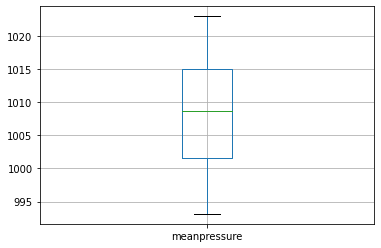

In [42]:
df[['meanpressure']].boxplot()
plt.show()

In [43]:
selected_features = ['humidity', 'wind_speed']
target = ['meantemp']
df = df[selected_features + target]

In [44]:
train = df[df.index<"2016-08-01"] 
test = df[df.index>="2016-08-01"]

In [45]:
train['month'] = train.index.month
train = train.join(train.groupby('month').agg({'meantemp':'mean'}).reset_index(), on='month', rsuffix='_month')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
test['month'] = test.index.month
test = test.join(train.groupby('month').agg({'meantemp':'mean'}).reset_index(), on='month', rsuffix='_month')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
train.drop(columns=['month','month_month'], inplace=True)
test.drop(columns=['month','month_month'], inplace=True)

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
min_max = MinMaxScaler()

In [50]:
train = pd.DataFrame(data = min_max.fit_transform(train), columns=train.columns)

In [51]:
test = pd.DataFrame(data =min_max.transform(test), columns=test.columns)

In [52]:
train.head()

,humidity,wind_speed,meantemp,meantemp_month
0,0.840372,0.000000,0.122271,0.140201
1,0.929054,0.173888,0.042795,0.140201
2,0.869932,0.270362,0.035662,0.140201
3,0.684685,0.071967,0.081514,0.140201
4,0.867962,0.215901,0.000000,0.140201


In [53]:
def remove_outliers(df, col):
  q1 = df[col].quantile(0,25)
  q3 = df[col].quantile(0,75)
  iqr = q3-q1
  df[(df[col]>(q1-1.5*iqr)) & (df[col]<(q3+1.5*iqr))]
  return df
  